reading csv file

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Z:/studentperf.csv")

In [3]:
print(df)

     Gender Nationality Place of birth Educational Stages  Grade Levels  \
0      Male      KuwaIT         KuwaIT          lowerlevel         G-04   
1      Male      KuwaIT         KuwaIT          lowerlevel         G-04   
2      Male      KuwaIT         KuwaIT          lowerlevel         G-04   
3      Male      KuwaIT         KuwaIT          lowerlevel         G-04   
4      Male      KuwaIT         KuwaIT          lowerlevel         G-04   
5    Female      KuwaIT         KuwaIT          lowerlevel         G-04   
6      Male      KuwaIT         KuwaIT        MiddleSchool         G-07   
7      Male      KuwaIT         KuwaIT        MiddleSchool         G-07   
8    Female      KuwaIT         KuwaIT        MiddleSchool         G-07   
9    Female      KuwaIT         KuwaIT        MiddleSchool         G-07   
10     Male      KuwaIT         KuwaIT        MiddleSchool         G-07   
11     Male      KuwaIT         KuwaIT        MiddleSchool         G-07   
12     Male      KuwaIT  

1)basic description of data-counting no of rows and columns

In [4]:
count=0
for col in df:
    count += 1

In [5]:
print("no of columns",count)

no of columns 17


In [6]:
f = open("Z:/studentperf.csv")
numlines = len(f.readlines())

In [7]:
print("no of rows",numlines)

no of rows 481


2)visualize the data

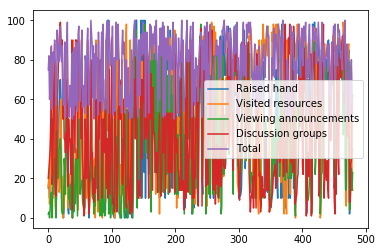

In [9]:
df.plot()

In [10]:
import matplotlib
import matplotlib.pyplot as pl
#file to read in
infile = 'Z:\studentperf.csv'

#pull data into NumPy dataframe
df = pd.read_csv(infile, sep=',', na_values='.')

In [11]:
slice = df.iloc[:,[15, 16]]

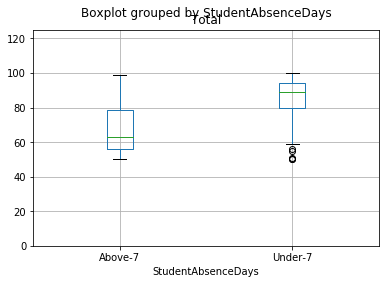

In [12]:
bp = slice.boxplot(column='Total', by='StudentAbsenceDays')
axes = pl.gca()
axes.set_ylim([0,125])
pl.show()

3)identify patterns-identifying similar rows

In [13]:
from collections import Counter
import csv

with open("Z:/studentperf.csv") as f:
    next(f)
    counts = Counter(frozenset(tuple(row[14].split(",")))
                     for row in csv.reader(f))
    print(counts.most_common())

[(frozenset({'Good'}), 292), (frozenset({'Bad'}), 188)]


In [14]:
from collections import Counter
import csv

with open("Z:/studentperf.csv") as f:
    next(f)
    counts = Counter(frozenset(tuple(row[15].split(",")))
                     for row in csv.reader(f))
    print(counts.most_common())

[(frozenset({'Under-7'}), 289), (frozenset({'Above-7'}), 191)]


4)descriptive statistics

In [15]:
df.describe()

,Raised hand,Visited resources,Viewing announcements,Discussion groups,Total
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333,78.627083
std,30.779223,33.080007,26.611244,27.637735,14.764841
min,0.000000,0.000000,0.000000,1.000000,50.000000
25%,15.750000,20.000000,14.000000,20.000000,67.000000
50%,50.000000,65.000000,33.000000,39.000000,81.000000
75%,75.000000,84.000000,58.000000,70.000000,90.000000
max,100.000000,99.000000,98.000000,99.000000,100.000000


In [ ]:
6)predicting the marks using social attributes-discussion groups

0.16718178492050795 71.39089840935735


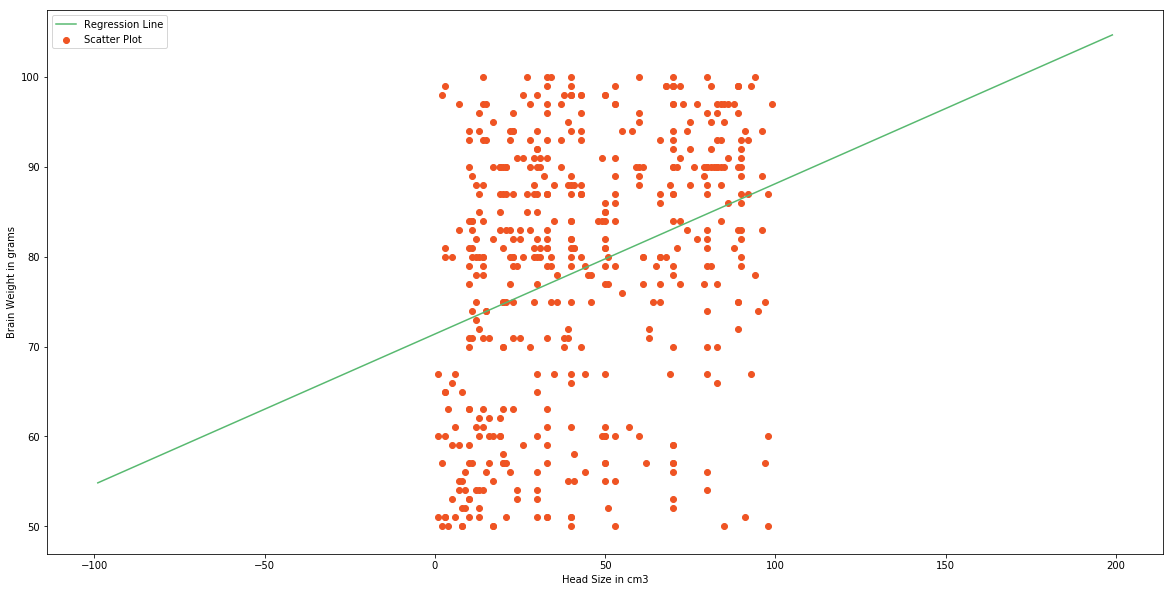

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
data = pd.read_csv("Z:/studentperf.csv")
X = data['Discussion groups'].values
Y = data['Total'].values
mean_x = np.mean(X)
mean_y = np.mean(Y)
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

7) checking validity

In [20]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

feature_cols = ['Raised hand']
X = data[feature_cols]
y = data.Total

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

64.80589023078515
[0.29548248]


In [18]:
lm2.predict(50)

array([79.58001434])